# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

# Импорт библиотек

In [1]:
# импорты библиотек

import random
import numpy as np
import pandas as pd
from typing import Union

# визуализация данных
import seaborn as sns
import matplotlib.pyplot as plt

# предобработка данных
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, PolynomialFeatures, StandardScaler

# ML-модели
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge

# оптимизация гиперпараметров
from sklearn.model_selection import GridSearchCV

# оценивание моделей
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error as MSE

# сохранение модели
import dill as pickle

In [2]:
# фиксирование random seed
random.seed(42)
np.random.seed(42)

In [3]:
# настройка отображения графиков
plt.style.use('fivethirtyeight')

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

**Ответ студента**: для того, чтобы любой человек мог запустить ноутбук-домашку и полностью воспроизвести полученные в домашке результаты.

# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [4]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [5]:
# создание копий df_train и df_test для тестирования итоговой модели
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [6]:
# вывод на экран 10 случайных строк df_train
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [7]:
# вывод на экран первых и последних 5 объектов df_test
display(df_test.head())
display(df_test.tail())

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [8]:
# создание словаря с трейном и тестом
dfs_dict = {
    'train': df_train,
    'test': df_test
}

In [9]:
# по каждому датасету вывод на экран статистик по числовым и категориальным признакам
for df_name, df in dfs_dict.items():
    print(f'датасет {df_name}')
    print('- статистики по числовым признакам:')
    display(df.describe(exclude='object'))
    print('- статистики по категориальным признакам:')
    display(df.describe(include='object'))
    print('-' * 50)
    print()

датасет train
- статистики по числовым признакам:


,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


- статистики по категориальным признакам:


,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


--------------------------------------------------

датасет test
- статистики по числовым признакам:


,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


- статистики по категориальным признакам:


,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


--------------------------------------------------


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [10]:
# по каждому датасету вывод на экран названий столбцов с пропусками и количества пропусков
for df_name, df in dfs_dict.items():
    print(f'Пропуски в датасете {df_name}:')
    df_nans = df.isna().sum()[df.isna().sum() > 0].reset_index().rename(columns = {'index': 'столбец', 0: 'кол-во пропусков'})
    display(df_nans)
    print()

Пропуски в датасете train:


,столбец,кол-во пропусков
0,mileage,202
1,engine,202
2,max_power,196
3,torque,203
4,seats,202



Пропуски в датасете test:


,столбец,кол-во пропусков
0,mileage,19
1,engine,19
2,max_power,19
3,torque,19
4,seats,19


**Ответ студента**: пропуски есть в пяти столбцах: `mileage`, `engine`, `max_power`, `torque` и `seats`.

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [11]:
# подсчет и вывод на экран количества объектов трейна с одинаковым признаковым описанием (без учета целевой переменной)
duplicated_cnt = df_train.drop(columns=['selling_price']).duplicated().sum()
print(f'Количество объектов трейна с одинаковым признаковым описанием: {duplicated_cnt}')

Количество объектов трейна с одинаковым признаковым описанием: 1159


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [12]:
# вывод на экран первых 10 объектов трейна с одинаковым признаковым описанием (без учета целевой переменной), отсортированных по name
df_train[df_train.drop(columns=['selling_price']).duplicated(keep=False)].sort_values(by='name').head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1703,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
1836,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
117,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
2787,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
6640,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
4485,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
1595,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
1337,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [13]:
# удаление из трейна повторяющихся (за исключением цены) строк
df_train.drop_duplicates(subset=[col for col in df_train.columns if col != 'selling_price'], 
                         keep='first', inplace=True)

In [14]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [15]:
# обновление индексов трейна после удаления дубликатов
df_train.reset_index(drop=True, inplace=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [16]:
def remove_mu_col(col: pd.Series) -> pd.DataFrame:
    '''
    Функция убирает единицы измерения в значениях столбца.
    
    :param col_val: столбец до трансформации
    :return: столбец после трансформации
    '''
    
    def remove_mu(val: Union[str, float]) -> float:
        if type(val) == float:return val
        
        val = val.split()[0]
        
        try: return float(val)
        except: return np.nan
    
    return pd.DataFrame(col).map(remove_mu)

In [17]:
# столбы mileage, engine и max_power: убираем единицы измерения и меняем тип данных на float
for df in dfs_dict.values():
    for col in ['mileage', 'engine', 'max_power']:
        df[col] = remove_mu_col(df[col])

Напишем функцию для разделения изначального признака `torque` на новые признаки `torque` и `max_torque_rpm`:

In [18]:
def split_torque_col(x, **kwargs):
    
    # создание функции split_torque
    def split_torque(torque: str, output: str = 'torque') -> Union[int, float]:
        '''
        Функция разделяет изначальный признак torque на новые признаки torque и max_torque_rpm.
        
        Если в значении изначального признака torque пропуск, возвращется пропуск (для последующей обработки пропусков)
        Если значение torque изначального признака torque было указано в kgm, значение нового признака torque конвертируется в nm.
        Если значение torque_rpm изначального признака torque было указано в виде диапазона, в качестве нового признака max_torque_rpm возвращается 
        максимальное значение.
        
        :param torque: значение изначального признака torque 
        :param output: название нового признака, который необходимо вернуть
        :return: значение нового признака torque или max_torque_rpm
        '''
        
        if type(torque) == float: 
            
            return torque
        
        trq = False
        convert_kgm = False
        
        torque = torque.lower()
        
        if ('kgm' or 'nm' or '@') in torque:
            trq = True
            
        if 'kgm' in torque:
            convert_kgm = True
            
        torque = ''.join([char if char not in ',/' else '' for char in torque])
        torque = ''.join([char if char in '01234567890.-+' else ' ' for char in torque])
        torque = torque.split()
        
        temp = []
        
        for val in torque:
            
            if '+-' in val:
                val = val.split('+-')
                val = sum(int(i) for i in val)     
                
            elif '-' in val:
                val = val.split('-')
                val = max(int(i) for i in val)
            
            else:
                if '.' in val:
                    val = float(val)
                else:
                    val = int(val)
            
            temp.append(val)
        
        if len(temp) < 2:
            if trq is False:
                temp = [np.nan] + temp
            else:
                temp.append(np.nan)
                
        if convert_kgm is True:
            temp[0] = np.round(temp[0] * 9.80665)
        
        if output == 'max_torque_rpm':
            
            return temp[1]
        
        return temp[0]
    
    if kwargs['output'] == 'max_torque_rpm':
        return pd.DataFrame(x).map(split_torque, **kwargs).rename(columns={'torque':'max_torque_rpm'})
    else:
        return pd.DataFrame(x).map(split_torque, **kwargs)
    

In [19]:
# для трейна и теста создание новых столбцов-признаков max_torque_rpm и torque из изначального столбца-признака torque при помощи функции split_torque_col
df_train['max_torque_rpm'] = split_torque_col(df_train['torque'], output='max_torque_rpm')
df_train['torque'] = split_torque_col(df_train['torque'], output='torque')

df_test['max_torque_rpm'] = split_torque_col(df_test['torque'], output='max_torque_rpm')
df_test['torque'] = split_torque_col(df_test['torque'], output='torque')

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [20]:
# создание списка с названиями столбцов с пропусками
isna_cols = df_train.isna().sum()[df_train.isna().sum() > 0].index

In [21]:
# создание объекта класса SimpleImputer
imp_median = (SimpleImputer(missing_values=np.nan, strategy='median')).set_output(transform='pandas')

In [22]:
# заполнение пропусков медианой в трейне и тесте
df_train[isna_cols] = imp_median.fit_transform(df_train[isna_cols])
df_test[isna_cols] = imp_median.transform(df_test[isna_cols])


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [23]:
def to_int(col: pd.Series) -> pd.DataFrame:
    return pd.DataFrame(col).astype(int)

In [24]:
# изменение типов данных столбцов engine, seats и max_torque_rpm
for df in dfs_dict.values():
    for col in ['engine', 'seats', 'max_torque_rpm']:
        df[col] = to_int(df[col])

**Ответ студента**: по условиям ДЗ мы ограничены линейными моделями, которые предполагают линейную зависимость между признаками и целевым признаком.

В нашем случае, если мы оставляем признак `seats` числовым, то обучаемые нами линейные модели должны предположить или прямую зависимость между количеством мест и ценой (чем больше мест, тем дороже машина), или обратную зависимость (чем меньше мест, тем дороже машина).

При этом мы можем представить пару классов автомобилей, для которых одновременно не сможет выполняться ни прямая, ни обратная зависимость: автомобили класса A (например, Smart) и класса S (например, Porsche 911) могут иметь два места, но стоить диаметрально противоположно. 


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

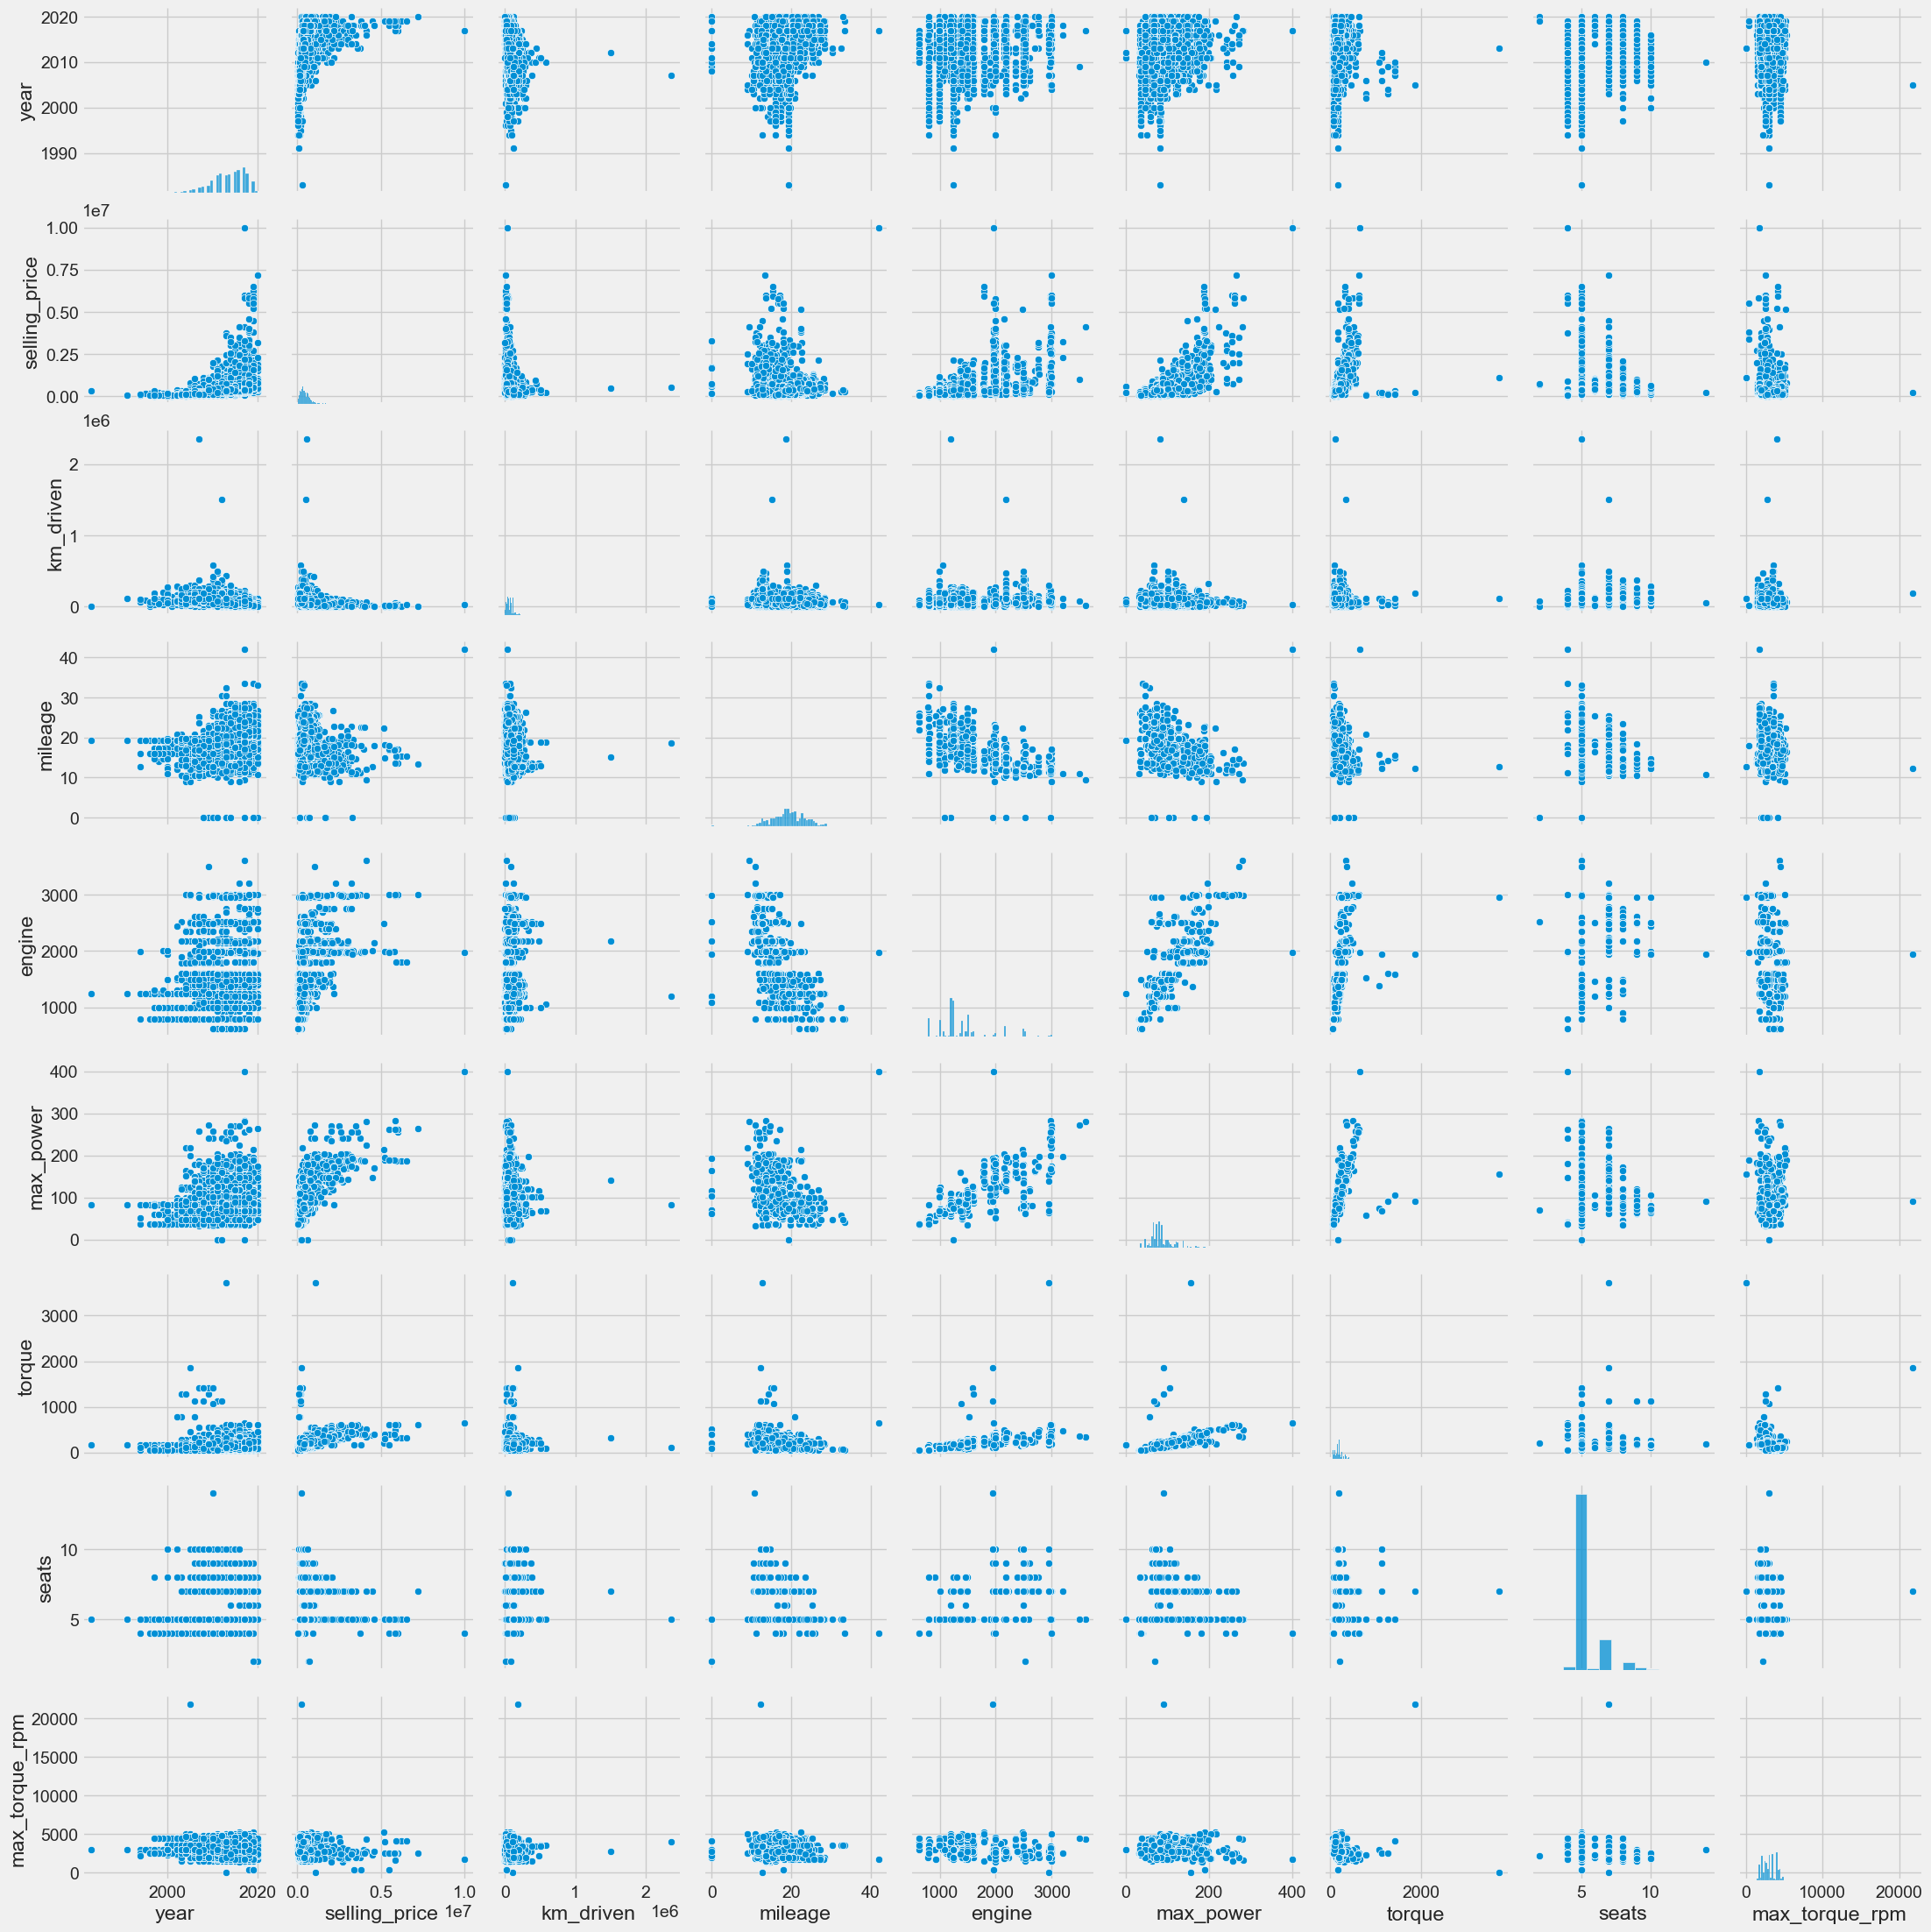

In [25]:
# построение графика попарных распределений числовых признаков трейна
sns.pairplot(df_train.select_dtypes(exclude='object'))
plt.show()

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

**Ответ студента**:
- *связь предикторов с целевой переменной*: на трейне мы видим: 
    - ожидаемую положительную корреляцию между целевой переменной `selling_price` и признаком `year` (чем машина новее, тем выше цена)
    - положительную корреляцию между целевой переменной `selling_price` и признаками-характеристиками двигателя `engine`, `max_power` и `torque` (чем больше объем двигателя, максимальная мощность и крутящий момент, тем выше цена)
    - ожидаемую отрицальную корреляцию между целевой переменной `selling_price` и признаком `km_driven` (чем выше пробег, тем ниже цена)
- *корреляция признаков*: на трейне мы видим:
    - ожидаемую положительную корреляцию между признаками-характеристиками двигателя `engine`, `max_power` и `torque`
    - ожидаемую отрицальную корреляцию между признаками-характеристиками двигателя `engine`, `max_power` и `torque` и при знаком `mileage` (чем мощнее машина, тем меньше расстояние, которое она может проехать на фиксированном количестве топлива)
- *прочие выводы*: то обстоятельство, что признаки-характеристики двигателя `engine`, `max_power` и `torque` положительно коррелируют между собой и с целевой переменной `selling_price`, указывает на целесообразность применения регуляризации.

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

Чтобы не скроллить экран между графиками попарных распределений числовых признаков на трейне и тесте, визуализируем их на одном графике:

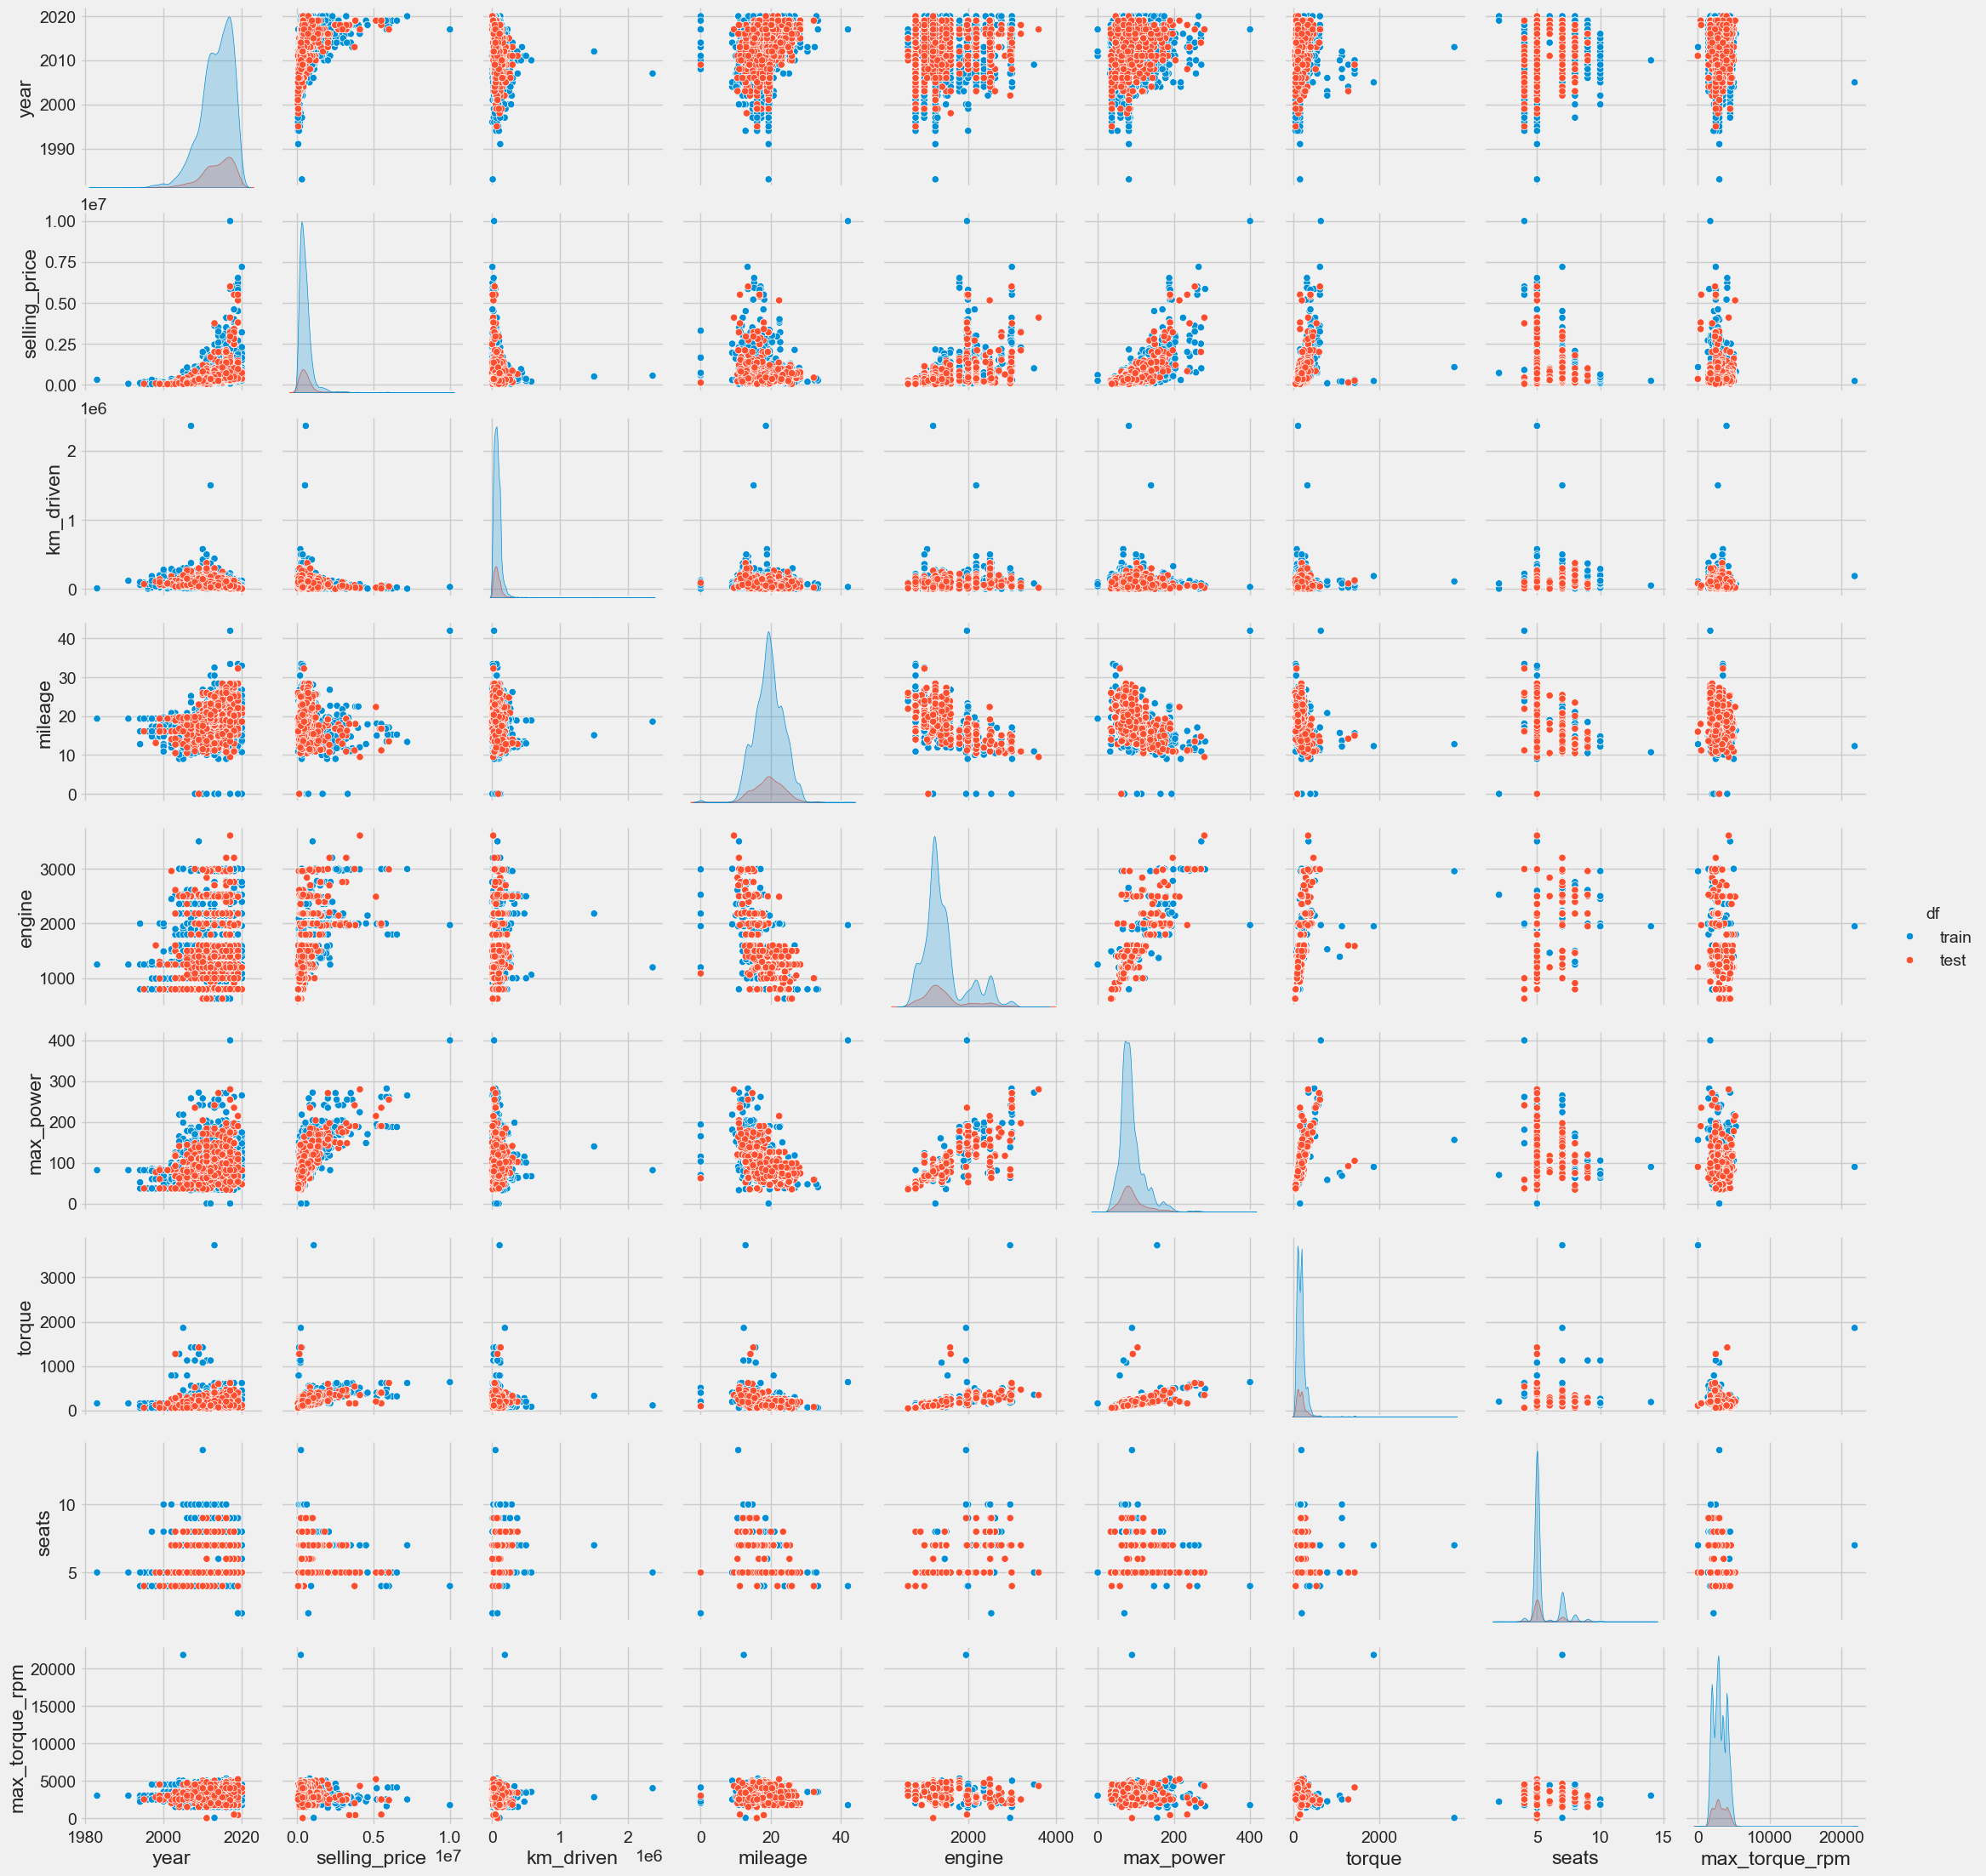

In [26]:
# объединение трейна и текста с новым столбцом-индикатором датасета
data = pd.concat([df_train, df_test]).select_dtypes(exclude='object').reset_index(drop=True).join(
    pd.DataFrame.from_dict({'df': ['train'] * len(df_train) + ['test'] * len(df_test)})
)

# построение графика попарных распределений числовых признаков трейна и теста
sns.pairplot(data=data, hue='df')
plt.show()

Распределения числовых признаков на трейне и тесте оказались похожими, поэтому мы можем ожидать, что результаты обученных моделей на трейне и тесте не будут существенно отличаться.

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

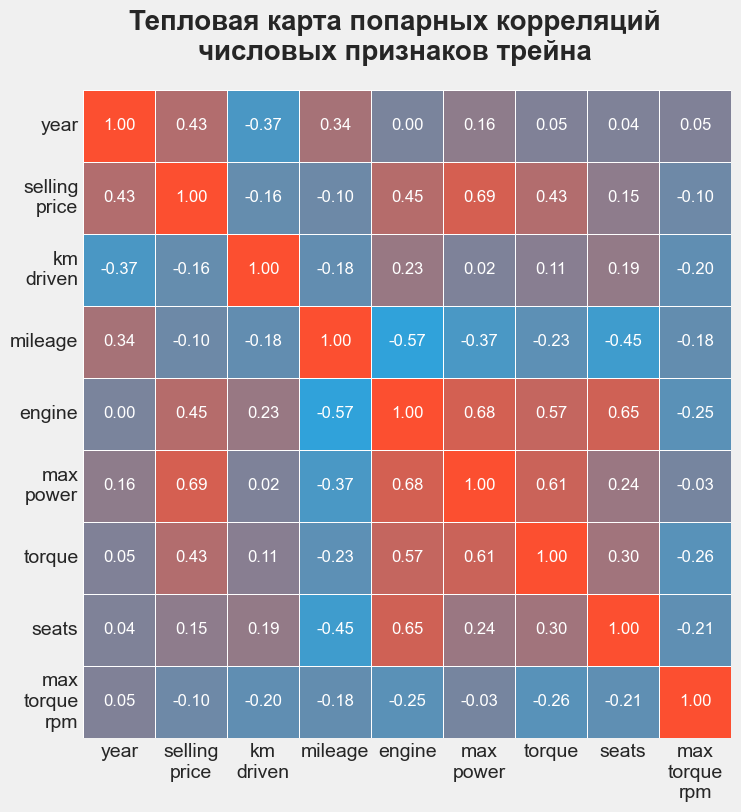

In [27]:
# построение тепловой карты попарных корреляций числовых признаков трейна
ticklabels = ['\n'.join(col.split('_')) for col in df_train.select_dtypes(exclude='object').columns]
custom_palette = sns.blend_palette(colors=['#30a2da', '#fc4f30'], as_cmap=True)

fig = plt.figure(figsize=(8,8))

fig.suptitle('Тепловая карта попарных корреляций\nчисловых признаков трейна', fontsize=20, fontweight='bold')

sns.heatmap(df_train.select_dtypes(exclude='object').corr(), cbar=False, square=True, annot=True,
            xticklabels=ticklabels, yticklabels=ticklabels, annot_kws={'fontsize': 12}, fmt=".2f", cmap=custom_palette,linewidth=.5)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

**Ответ студента**:

*Какие 2 признака наименее скоррелированы между собой?*

Признаки `year` и `engine` наимене скоррелированы между собой: значение корреляции между ними $\approx 0$

*Между какими признаками наблюдается довольно сильная положительная линейная зависимость?*

Если не учитывать целевую переменную, довольно сильная положительная линейная зависимость наблюдается между парами признаков:
- `engine` и `max_power` (0.68)
- `torque` и `max_power` (0.67)
- `engine` и `seats` (0.65)
- `engine` и `torque` (0.61)

*Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?*

Если опираться только на данные тепловой карты, то да, поскольку между признаками `year` и `km_driven` наблюдается отрицательная линейная зависимость (-0.37). Если же дополнительно изучить график попарных распределений числовых признаков, то все становится не так однозначно: для машин не страше 2010 года зависимость отрицательная (чем меньше год, тем меньше проеханных киломентов), для машин старше — положительная (чем меньше год, тем меньше проеханных километров)

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

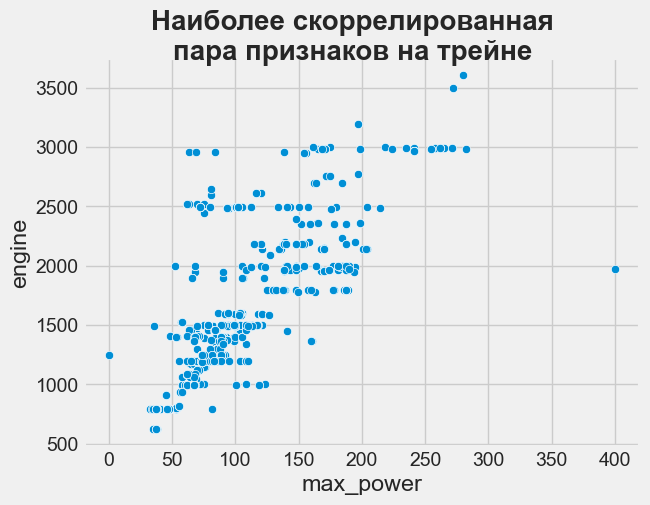

In [28]:
# вывод на экран наиболее скоррелированной пары признаков на трейне
fig = plt.figure()
fig.suptitle('Наиболее скоррелированная\nпара признаков на трейне',
             fontsize=20, fontweight='bold')

sns.scatterplot(data=df_train, x='max_power', y='engine')
plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

**Ответ студента**: давайте дополнительно посмотрим на распределения количественных признаков (считаем признак `seats` категоримальным) и целевой переменной на трейне и тесте, чтобы понять:
- имеют ли распределения одних и тех же признаков на трейне и тесте одинаковую форму
- распределены ли данные нормально
- насколько много в данных выбросов

Для этого посмотрим на графики оценки распределения ядра и диаграммы размаха:

In [29]:
# создание списка с названиями количественных признаков и целевой переменной
num_feats = df_train.select_dtypes(exclude='object').drop(columns=['seats']).columns

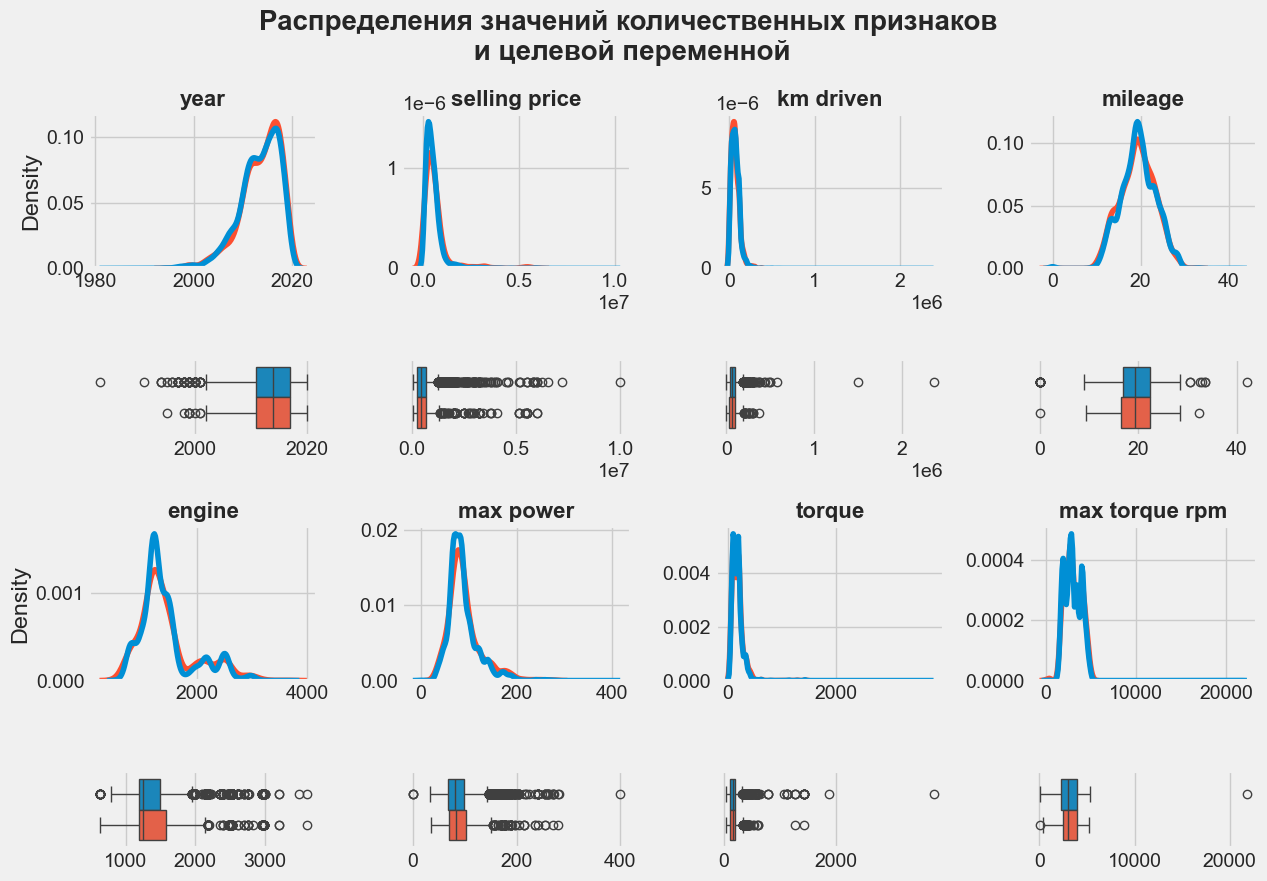

In [30]:
# построение графиков оценки распределения ядра и диаграмм разхмаха количественных признаков и целевой переменной
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(13,9), height_ratios=(2,1,2,1))
axs = axs.flatten()

fig.suptitle('Распределения значений количественных признаков\n и целевой переменной', fontsize=20, fontweight='bold')

for i, feat in enumerate(num_feats):
    if i < 4:
        sns.kdeplot(data=data, x=feat, hue='df', ax=axs[i], common_norm=False, legend=False)
        sns.boxplot(data=data, x=feat, hue='df', ax=axs[i+4], legend=False)
    else:
        sns.kdeplot(data=data, x=feat, hue='df', ax=axs[i+4], common_norm=False, legend=False)
        sns.boxplot(data=data, x=feat, hue='df', ax=axs[i+8], legend=False)

for i in range(16):
    if i not in [0, 8]: axs[i].set_ylabel('')
    axs[i].set_xlabel('')
    
for i, feat in zip ([0,1,2,3,8,9,10,11], num_feats):
    axs[i].set_title(' '.join(feat.split('_')), fontsize=16, fontweight='bold')
     
plt.tight_layout()
plt.show()

Мы видим, что:
- распределения большинства количественных признаков и целевой переменной или сильно (в отдельных случаях экстремально) смещены, или вообще не напоминают нормальное распределени (например, распределение признака `max_torque_rpm` больше напоминает мультимодальное распредление); стоит подумать об их нелинейном преобразовании
- в значениях большинства количественных признаков и целевой переменной много выбросов; стоит подумать о способах снижения их влияния

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

Вместо предложенных названий переменных `X_train` и `X_test` используем более информативные названия `X_train_num` и `X_test_num`:

In [31]:
# сохранение количественных признаков и целевой переменной трейна в отдельные переменные
y_train = df_train['selling_price']
X_train_num = df_train.select_dtypes(exclude='object').drop(columns=['selling_price'])

In [32]:
# закомментил assert, так как мы разбили признак torque на два
# assert X_train.shape == (5840, 6)

In [33]:
# сохранение количественных признаков и целевой переменной теста в отдельные переменные
y_test = df_test['selling_price']
X_test_num = df_test.select_dtypes(exclude='object').drop(columns=['selling_price'])

In [34]:
# закомментил assert, так как мы разбили признак torque на два
# assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

**Комментарий студента**: для расчета метрик на тесте будем использовать кросс-валидацию на 10 фолдах:

In [35]:
# создание словаря для сохранения метрик и списка с названиями метрик и вспомогательного словаря для переименования столбцов 
metrics_dict = dict()
rename_metrics_dict = {
    'index': 'model',
    0: 'r2_train',
    1: 'mse_train',
    2: 'r2_test',
    3: 'mse_test'
}

In [36]:
# создание модели линейной регрессии с дефолтными параметрами
lr = LinearRegression()

# расчет метрик на трейне
cv_results = cross_validate(lr, X_train_num, y_train, scoring=['r2', 'neg_mean_squared_error'], cv=10)
r2_train = cv_results['test_r2'].mean()
mse_train = abs(cv_results['test_neg_mean_squared_error'].mean())

# обучение модели на количественных признаках
lr.fit(X_train_num, y_train)

# получение предсказаний на тесте
preds_test = lr.predict(X_test_num)
 
# расчет метрик на тексте
r2_test = r2_score(y_test, preds_test)
mse_test = MSE(y_test, preds_test)

# сохранение метрик в словарь
metrics_dict['lr_default_num'] = [r2_train, mse_train, r2_test, mse_test]

# вывод на экран рассчитанных метрик
pd.DataFrame(metrics_dict).T.reset_index().rename(columns=rename_metrics_dict)

,model,r2_train,mse_train,r2_test,mse_test
0,lr_default_num,0.574908,1.191569e+11,0.605189,2.269489e+11


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [37]:
# cтандартизация числовых признаков трейна и теста
scaler = StandardScaler().set_output(transform='pandas')
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [38]:
# расчет метрик на трейне
cv_results = cross_validate(lr, X_train_num_scaled, y_train, scoring=['r2', 'neg_mean_squared_error'], cv=10)
r2_train = cv_results['test_r2'].mean()
mse_train = abs(cv_results['test_neg_mean_squared_error'].mean())

# обучение модели на количественных признаках
lr.fit(X_train_num_scaled, y_train)

# получение предсказаний на тесте
preds_test = lr.predict(X_test_num_scaled)
 
# расчет метрик на тексте
r2_test = r2_score(y_test, preds_test)
mse_test = MSE(y_test, preds_test)

# сохранение метрик в словарь
metrics_dict['lr_default_num_scaled'] = [r2_train, mse_train, r2_test, mse_test]

# вывод на экран рассчитанных метрик
pd.DataFrame(metrics_dict).T.reset_index().rename(columns=rename_metrics_dict)

,model,r2_train,mse_train,r2_test,mse_test
0,lr_default_num,0.574908,1.191569e+11,0.605189,2.269489e+11
1,lr_default_num_scaled,0.574908,1.191569e+11,0.605189,2.269489e+11


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [39]:
# создание датафрейма с названиями количественных признаков и соответствующими им коэффициентами обученной модели
lr_coef_df = pd.DataFrame(lr.coef_, index=lr.feature_names_in_, columns=['lr_coef'])
lr_coef_df.sort_values(by='lr_coef', ascending=False, inplace=True)

lr_coef_df

,lr_coef
max_power,333839.200806
year,165617.630387
engine,22590.518314
torque,-1678.784740
mileage,-9111.949660
seats,-30030.882260
km_driven,-49197.511558
max_torque_rpm,-63580.720775


**Ответ студента**: наиболее информативным в предсказании цены оказался признак `max_power`, так как у него наибольший (по модулю) коэффициент модели линейной регресси, обученной на стандартизированных признаках.

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [40]:
# создание Lasso-модели с дефолтными параметрами
lasso = Lasso()

# расчет метрик на трейне
cv_results = cross_validate(lasso, X_train_num_scaled, y_train, scoring=['r2', 'neg_mean_squared_error'], cv=10)
r2_train = cv_results['test_r2'].mean()
mse_train = abs(cv_results['test_neg_mean_squared_error'].mean())

# обучение модели на количественных признаках
lasso.fit(X_train_num_scaled, y_train)

# получение предсказаний на тесте
preds_test = lasso.predict(X_test_num_scaled)
 
# расчет метрик на тексте
r2_test = r2_score(y_test, preds_test)
mse_test = MSE(y_test, preds_test)

# сохранение метрик в словарь
metrics_dict['lasso_default_num_scaled'] = [r2_train, mse_train, r2_test, mse_test]

# вывод на экран рассчитанных метрик
pd.DataFrame(metrics_dict).T.reset_index().rename(columns=rename_metrics_dict).iloc[[1,2],:]

,model,r2_train,mse_train,r2_test,mse_test
1,lr_default_num_scaled,0.574908,1.191569e+11,0.605189,2.269489e+11
2,lasso_default_num_scaled,0.574909,1.191568e+11,0.605187,2.269498e+11


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [41]:
# создание датафрейма с названиями количественных признаков и соответствующими им коэффициентами обученной Lasso-модели
lasso_coef_df = pd.DataFrame(lasso.coef_, index=lasso.feature_names_in_, columns=['lasso_coef'])
lasso_coef_df.sort_values(by='lasso_coef', ascending=False, inplace=True)

# вывод на экран коэффициентов Lasso-модели и модели линейной регрессии на с дефолтными параметрами
lr_coef_df.join(lasso_coef_df)

,lr_coef,lasso_coef
max_power,333839.200806,333838.721550
year,165617.630387,165615.650823
engine,22590.518314,22587.778814
torque,-1678.784740,-1675.707003
mileage,-9111.949660,-9109.016891
seats,-30030.882260,-30027.123307
km_driven,-49197.511558,-49196.573864
max_torque_rpm,-63580.720775,-63578.029485


**Ответ студента**: Lasso-модель с дефолтными параметрами незначительно уменьшила значения (по модулю) весов (по сравнению с весами линейной регрессии). Это произошло потому, что:
- за силу L1-регуляризации Lasso-модели отвечает гиперпараметр `alpha`;
- данный гиперпараметр может принимать значения от 0 до бесконечности (чем больше его значение, тем сильнее L1-регуляризация, тем сильнее зануляются веса);
- дефолтное значение гиперпараметра `alpha` равно 1 (что соответствует очень слабой L1-регуляризации)

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [42]:
# создание словаря с возможными значениями оптимизируемых гиперпараметров Lasso-модели
lasso_param_grid = {'alpha': np.logspace(1, 4, num=100)}

In [43]:
%%time
# оптимизация гиперпараметров
lasso_grid = GridSearchCV(lasso, param_grid=lasso_param_grid, cv=10, verbose=1).fit(X_train_num_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
CPU times: user 32.8 s, sys: 7.47 s, total: 40.3 s
Wall time: 7.02 s


In [44]:
# расчет метрик на трейне
cv_results = cross_validate(lasso_grid.best_estimator_, X_train_num_scaled, y_train, scoring=['r2', 'neg_mean_squared_error'], cv=10)
r2_train = cv_results['test_r2'].mean()
mse_train = abs(cv_results['test_neg_mean_squared_error'].mean())

# получение предсказаний на тесте
preds_test = lasso_grid.best_estimator_.predict(X_test_num_scaled)
 
# расчет метрик на тексте
r2_test = r2_score(y_test, preds_test)
mse_test = MSE(y_test, preds_test)

# сохранение метрик в словарь
metrics_dict['lasso_grid_num_scaled'] = [r2_train, mse_train, r2_test, mse_test]

# вывод на экран рассчитанных метрик
pd.DataFrame(metrics_dict).T.reset_index().rename(columns=rename_metrics_dict).iloc[[1,2,3],:]

,model,r2_train,mse_train,r2_test,mse_test
1,lr_default_num_scaled,0.574908,1.191569e+11,0.605189,2.269489e+11
2,lasso_default_num_scaled,0.574909,1.191568e+11,0.605187,2.269498e+11
3,lasso_grid_num_scaled,0.581089,1.189975e+11,0.590519,2.353814e+11


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

**Ответ студента**: мы перебрали 100 возможных значений гиперпараметра `alpha`, и для каждого значения 10 раз обучили модель с ним на 9 разных фолдах (10 фолд - для расчета метрик), т.е. грид-серчу пришлось обучить 100 разных моделей, 10 раз каждое значение гиперпараметра.

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [45]:
print(f'Значения гиперпараметров лучшей Lasso-модели: {lasso_grid.best_params_}')

Значения гиперпараметров лучшей Lasso-модели: {'alpha': 10000.0}


In [46]:
# создание датафрейма с названиями количественных признаков и соответствующими им коэффициентами обученной Lasso-модели
pd.DataFrame(lasso_grid.best_estimator_.coef_, index=lasso_grid.best_estimator_.feature_names_in_, columns=['lasso_coef']).sort_values(by='lasso_coef', ascending=False)

,lasso_coef
max_power,336490.917860
year,153694.539400
mileage,0.000000
engine,0.000000
torque,0.000000
seats,-580.346275
km_driven,-39581.205924
max_torque_rpm,-48485.340359


**Ответ студента**: в результате подбора гиперпараметра `alpha` занулились веса трех количественных признаков: `mileage`, `engine` и `torque`.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [47]:
# создание ElasticNet-модели
enet = ElasticNet(max_iter=10000)

In [48]:
# создание словаря с возможными значениями оптимизируемых гиперпараметров ElasticNet-модели
enet_param_grid = {
    'alpha': np.logspace(1, 4, num=100),
    'l1_ratio': np.arange(0.1, 1.0, 0.1)
}

In [49]:
%%time
# оптимизация гиперпараметров
enet_grid = GridSearchCV(enet, param_grid=enet_param_grid, cv=10).fit(X_train_num_scaled, y_train)

CPU times: user 2min 36s, sys: 35.3 s, total: 3min 11s
Wall time: 28.3 s


In [50]:
# расчет метрик на трейне
cv_results = cross_validate(enet_grid.best_estimator_, X_train_num_scaled, y_train, scoring=['r2', 'neg_mean_squared_error'], cv=10)
r2_train = cv_results['test_r2'].mean()
mse_train = abs(cv_results['test_neg_mean_squared_error'].mean())

# получение предсказаний на тесте
preds_test = enet_grid.best_estimator_.predict(X_test_num_scaled)
 
# расчет метрик на тексте
r2_test = r2_score(y_test, preds_test)
mse_test = MSE(y_test, preds_test)

# сохранение метрик в словарь
metrics_dict['enet_grid_num_scaled'] = [r2_train, mse_train, r2_test, mse_test]

# вывод на экран рассчитанных метрик
pd.DataFrame(metrics_dict).T.reset_index().rename(columns=rename_metrics_dict).iloc[[1,4],:]

,model,r2_train,mse_train,r2_test,mse_test
1,lr_default_num_scaled,0.574908,1.191569e+11,0.605189,2.269489e+11
4,enet_grid_num_scaled,0.513482,1.473944e+11,0.431474,3.268051e+11


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [51]:
# вывод на экран гиперпараметров лучшей из перебранных ElasticNet-моделей
print(f'Значения гиперпараметров лучшей ElasticNet-модели: {enet_grid.best_params_}')

Значения гиперпараметров лучшей ElasticNet-модели: {'alpha': 10.0, 'l1_ratio': 0.9}


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [52]:
# cоздание переменной с категориальными признаками путем удаления столбцов name и selling_price
X_train_cat = df_train.drop(columns=['name', 'selling_price'])

In [53]:
# закомментил assert, так как мы разбили torque на два признака
# assert X_train_cat.shape == (5840, 10)

In [54]:
# вывод на экран описательных статистик по категориальным признакам
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [55]:
# создание списка с названиями используемых категориальных признаков
cat_features = X_train_cat.select_dtypes(include=['object']).columns.tolist() + ['seats']

In [56]:
# создание объекта класса OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False).set_output(transform='pandas')

In [57]:
# кодирование категориальных признаков методом OTH
X_train_cat = ohe.fit_transform(X_train_cat[cat_features])
X_test_cat = ohe.transform(df_test[cat_features])

In [58]:
# объединение предобработанных количественных и категориальных признаков для трейна и теста
X_train_full_scaled = X_train_num_scaled.drop(columns=['seats']).join(X_train_cat)
X_test_full_scaled = X_test_num_scaled.drop(columns=['seats']).join(X_test_cat)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [59]:
# создание Ridge-модели
ridge = Ridge()

In [60]:
# создание словаря с возможными значениями оптимизируемых гиперпараметров Ridge-модели
ridge_param_grid = {'alpha': np.logspace(1, 4, num=100)}

In [61]:
%%time
# оптимизация гиперпараметров
ridge_grid = GridSearchCV(ridge, param_grid=ridge_param_grid, cv=10, scoring='r2').fit(X_train_full_scaled, y_train)

CPU times: user 38.9 s, sys: 7.16 s, total: 46 s
Wall time: 8.14 s


In [62]:
# расчет метрик на трейне
cv_results = cross_validate(ridge_grid.best_estimator_, X_train_full_scaled, y_train, scoring=['r2', 'neg_mean_squared_error'], cv=10)
r2_train = cv_results['test_r2'].mean()
mse_train = abs(cv_results['test_neg_mean_squared_error'].mean())

# получение предсказаний на тесте
preds_test = ridge_grid.best_estimator_.predict(X_test_full_scaled)
 
# расчет метрик на тексте
r2_test = r2_score(y_test, preds_test)
mse_test = MSE(y_test, preds_test)

# сохранение метрик в словарь
metrics_dict['ridge_grid_full'] = [r2_train, mse_train, r2_test, mse_test]

# вывод на экран рассчитанных метрик
pd.DataFrame(metrics_dict).T.reset_index().rename(columns=rename_metrics_dict).iloc[[1,5],:]

,model,r2_train,mse_train,r2_test,mse_test
1,lr_default_num_scaled,0.574908,1.191569e+11,0.605189,2.269489e+11
5,ridge_grid_full,0.627568,1.055599e+11,0.657373,1.969521e+11


In [63]:
# вывод на экран гиперпараметров лучшей из перебранных Ridge-моделей
print(f'Значения гиперпараметров лучшей Ridge-модели: {ridge_grid.best_params_}')

Значения гиперпараметров лучшей Ridge-модели: {'alpha': 10.0}


**Ответ студента**: при использовании количественных и категориальных признаков и Ridge-модели с оптимизированными гиперпараметрами качество предсказаний на трейне и тесте существенно улучшилось (по сравнению с другими обученными линейными моделями).

# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регрессии, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

Для начала посчитаем baseline, с которым мы будем сравнивать результаты наших экспериментов: r2 `LinearRegression` на дефолтных параметрах количественных (после стандартизации) и категориальных (после OneHotEncoding) признаках:

In [64]:
# создание словаря для сохранения r2 при feature engineering и вспомогательного словаря для переименования столбцов 
fe_metrics_dict = dict()
rename_fe_metrics_dict = {
    'index': 'fe',
    0: 'r2_train'
}

# расчет и cохранение baseline r2 в словарь
fe_metrics_dict['baseline'] = [cross_val_score(LinearRegression(), X_train_full_scaled, y_train, cv=10, scoring='r2').mean()]

# вывод на экран раccчитанной метрики
pd.DataFrame(fe_metrics_dict).T.reset_index().rename(columns=rename_fe_metrics_dict)

,fe,r2_train
0,baseline,0.622091


## Обработка существующих признаков

Попробуем логарифмировать количественные признаки и целевую переменную и ограничить значения количественных признаков 0.5 и 99.5 персентилями:

In [65]:
# создание версии трейна с количественными и категориальными признаками до стандартизации
X_train_full = X_train_num.drop(columns=['seats']).join(X_train_cat)

In [66]:
# создание отдельных списков с названиями признаков для логарифмирования и стандартизации
scale_features = ['year', 'mileage', 'max_power']
log_features = ['km_driven', 'engine', 'torque', 'max_torque_rpm']

In [67]:
# создание препроцессинг-пайплайна
log_features_preprocessing = ColumnTransformer([
    ('scale', StandardScaler(), scale_features),
    ('log', FunctionTransformer(np.log), log_features)
], remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas')

/Users/kirill.rubashevskiy/PycharmProjects/car-price-prediction/venv/lib/python3.11/site-packages/sklearn/preprocessing/_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


In [68]:
# создание модели
log_features_pipeline = Pipeline([
    ('preprocessing', log_features_preprocessing),
    ('estimator', LinearRegression())
])

In [69]:
# расчет и cохранение r2 в словарь
fe_metrics_dict['log_features'] = [cross_val_score(log_features_pipeline, X_train_full, y_train, cv=10, scoring='r2').mean()]

# вывод на экран раccчитанной метрики
pd.DataFrame(fe_metrics_dict).T.reset_index().rename(columns=rename_fe_metrics_dict)

,fe,r2_train
0,baseline,0.622091
1,log_features,0.639672


In [70]:
# создание модели-пайплайна для логарифмирования таргета
log_target_pipeline = TransformedTargetRegressor(regressor=LinearRegression(),
                                                 func=np.log, inverse_func=np.exp)

In [71]:
# расчет и cохранение r2 в словарь
fe_metrics_dict['log_target'] = [cross_val_score(log_target_pipeline, X_train_full_scaled, y_train, cv=10, scoring='r2').mean()]

# вывод на экран раccчитанной метрики
pd.DataFrame(fe_metrics_dict).T.reset_index().rename(columns=rename_fe_metrics_dict).iloc[[0,2],:]

,fe,r2_train
0,baseline,0.622091
2,log_target,0.807302


In [72]:
# создание функции cap
def cap(col: pd.Series) -> pd.Series:
    '''
    Функция ограничивает значения столбца 0.5 и 99.5 персентилями.
    
    :param col: столбец
    :return: столбец после предобработки
    '''
    t_lower = np.percentile(col, 0.5)
    t_upper = np.percentile(col, 99.5)
    
    return np.where(col > t_upper, t_upper, np.where(col < t_lower, t_lower, col))
    

In [73]:
# создание списка с названиями столбцов для ограничения значений
cap_features = ['year', 'km_driven', 'mileage', 'engine', 'torque', 'max_torque_rpm']

In [74]:
# создание препроцессинг пайплайна
cap_preprocessing = ColumnTransformer([
    ('cap', FunctionTransformer(cap), cap_features)
], remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas')

/Users/kirill.rubashevskiy/PycharmProjects/car-price-prediction/venv/lib/python3.11/site-packages/sklearn/preprocessing/_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


In [75]:
# создание пайплайн-модели
cap_pipeline = Pipeline([
    ('preprocessing', cap_preprocessing),
    ('estimator', LinearRegression())
])

In [76]:
# расчет и cохранение r2 в словарь
fe_metrics_dict['cap_features'] = [cross_val_score(cap_pipeline, X_train_full_scaled, y_train, cv=10, scoring='r2').mean()]

# вывод на экран раccчитанной метрики
pd.DataFrame(fe_metrics_dict).T.reset_index().rename(columns=rename_fe_metrics_dict).iloc[[0,1,3],:]

,fe,r2_train
0,baseline,0.622091
1,log_features,0.639672
3,cap_features,0.638454


## Генерация новых признаков на основе существующих

Протестируем создание полиномиальных признаков:

In [77]:
# создание объекта класса PolynomialFeatures
poly = PolynomialFeatures()

In [78]:
# создание списка с названиями столбцов для создание полиноминальных признаков
poly_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power']

In [79]:
# создание пайплайн препроцессинга
poly_preprocessing = ColumnTransformer([
    ('poly', poly, poly_features)
], remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas')

In [80]:
# создание пайплайн модели
poly_pipeline = Pipeline([
    ('preprocessing', poly_preprocessing),
    ('estimator', LinearRegression())
])

In [81]:
# расчет и cохранение r2 в словарь
fe_metrics_dict['poly_features'] = [cross_val_score(poly_pipeline, X_train_full_scaled, y_train, cv=10, scoring='r2').mean()]

# вывод на экран раccчитанной метрики
pd.DataFrame(fe_metrics_dict).T.reset_index().rename(columns=rename_fe_metrics_dict).iloc[[0, 4],:]

,fe,r2_train
0,baseline,0.622091
4,poly_features,0.732288


## Создание новых признаков

Создадим новый признак — марку машины — на основе признака `name` и закодируем ее при помощи OneHotEncoding:

In [82]:
# создание трейна с ранее удаленным признаком name
X_train_full_scaled_w_name = X_train_full_scaled.join(df_train['name'])

In [83]:
# создание кастомного класса BrandRetrieverCustom для создания признака brand
class BrandRetrieverCustom(BaseEstimator, TransformerMixin):

    def split_brand(self, name: str) -> str:
            brand = name.split()[0] 
            return brand

    def fit(self, X, y=None):
        
        brands = pd.DataFrame(X).map(self.split_brand)
        self.main_brands = brands.value_counts()[brands.value_counts() > 30].reset_index()['name'].tolist()
        self.columns = ['brand']
        return self

    def transform(self, X):
        
        def assign_brand(name: str) -> str:
            brand = self.split_brand(name)
            if brand in self.main_brands:
                return brand
            return 'other'
                    
        return pd.DataFrame(X).map(assign_brand)
    
    def get_feature_names_out(self, *args, **params):
        return self.columns

In [84]:
# создание препроцессинг-пайплайна
brand_preprocessing = make_pipeline(
    ColumnTransformer([
        ('retrieve_brand', BrandRetrieverCustom(), 'name')
    ], remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas'),
    ColumnTransformer([
        ('ohe_brand', OneHotEncoder(sparse_output=False), ['brand'])
    ], remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas')
)

In [85]:
# создание пайплайн-модели
brand_pipeline = Pipeline([
    ('preprocessing', brand_preprocessing),
    ('estimator', LinearRegression())
])

In [86]:
# расчет и cохранение r2 в словарь
fe_metrics_dict['brand_features'] = [cross_val_score(brand_pipeline, X_train_full_scaled_w_name, y_train, cv=10, scoring='r2').mean()]

# вывод на экран раccчитанной метрики
pd.DataFrame(fe_metrics_dict).T.reset_index().rename(columns=rename_fe_metrics_dict).iloc[[0, 5],:]

,fe,r2_train
0,baseline,0.622091
5,brand_features,0.708350


## Соберем вместе лучшие идеи Feature Engineering (которые сочетаются вместе)

In [87]:
# создание трейна с ранее удаленным признаком name до стандартизации
X_train_full_w_name = X_train_full.join(df_train['name'])

In [88]:
# создание пайплайна лучшей модели
best_fe_pipeline = TransformedTargetRegressor(regressor=Pipeline([
    ('brand_preprocessing', brand_preprocessing),
    ('log_preprocessing', log_features_preprocessing),
    ('estimator',Ridge())
]), func=np.log, inverse_func=np.exp)

In [89]:
# расчет и cохранение r2 в словарь
fe_metrics_dict['best_fe'] = [cross_val_score(best_fe_pipeline, X_train_full_w_name, y_train, cv=10, scoring='r2').mean()]

# вывод на экран раccчитанной метрики
pd.DataFrame(fe_metrics_dict).T.reset_index().rename(columns=rename_fe_metrics_dict)

,fe,r2_train
0,baseline,0.622091
1,log_features,0.639672
2,log_target,0.807302
3,cap_features,0.638454
4,poly_features,0.732288
5,brand_features,0.708350
6,best_fe,0.857857


Подберем значения гиперпараметра для лучшей модели:

In [90]:
# создание словаря с возможными значениями оптимизируемых гиперпараметров Ridge-модели
best_model_param_grid = {'regressor__estimator__alpha': np.logspace(1, 4, num=100)}

In [91]:
%%time
# оптимизация гиперпараметров
best_model_grid = GridSearchCV(best_fe_pipeline, param_grid=best_model_param_grid, cv=10, scoring='r2').fit(X_train_full_w_name, y_train)

CPU times: user 2min 39s, sys: 43.4 s, total: 3min 23s
Wall time: 29.2 s


Протестируем ее на тесте:

In [92]:
# создание версии теста со всеми признаками до стандартизации
X_test_full = X_test_num.drop(columns=['seats']).join(X_test_cat)
X_test_full_w_name = X_test_full.join(df_test['name'])

In [93]:
best_model_grid.best_estimator_.fit(X_train_full_w_name, y_train)
preds_test = best_model_grid.best_estimator_.predict(X_test_full_w_name)

print(r2_score(y_test, preds_test))

0.8773310749889566


# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [94]:
def business_metrics(y_true, y_preds):
    
    return np.mean(np.abs(y_true.to_numpy() - y_preds) / y_true <= 0.1)

In [95]:
business_metrics(y_test, preds_test)

0.348

## Подготовка к деплойменту

Для деплоймента модели соберем ее и препроцессинг в единый пайплайн. Мы предполгаем, что на вход модели будут подаваться такие же данные, как и в исходных датасетах, поэтому соберем в пайплайн не только препроцессинг для feature engineering, но также базовй препроцессинг, который мы провели (заполнение пропусков, изменение типов данных, разделение признака `torque` на два и т.д.):

In [96]:
# создание списков с названиями признаков, для которых требуется определенный препроцессинг
remove_mu_features = ['mileage', 'engine', 'max_power']
scale_features = ['year', 'mileage', 'max_power']
log_features = ['km_driven', 'engine', 'torque', 'max_torque_rpm']
num_features = scale_features + log_features + ['seats']
cast_int_features = ['engine', 'seats', 'max_torque_rpm']
cat_features = ['fuel', 'seller_type', 'transmission', 'owner', 'seats', 'brand']

# создание пайплайна с базовым препроцессингом
base_preprocessing = make_pipeline(
    ColumnTransformer([
        ('remove_mu', FunctionTransformer(remove_mu_col), remove_mu_features),
        ('split_torque', FunctionTransformer(split_torque_col, kw_args={'output': 'torque'}), ['torque']),
        ('split_max_torque_rpm', FunctionTransformer(split_torque_col, kw_args={'output': 'max_torque_rpm'}), ['torque'])
    ], remainder='passthrough', verbose_feature_names_out=False),
    ColumnTransformer([
        ('impute_nans', SimpleImputer(missing_values=np.nan, strategy='median'), num_features)
    ], remainder='passthrough', verbose_feature_names_out=False),
    ColumnTransformer([
        ('cast_int', FunctionTransformer(to_int), cast_int_features)
    ], remainder='passthrough', verbose_feature_names_out=False)
).set_output(transform='pandas')

# создание пайплайна с feature engineering препроцессингом
fe_preprocessing = make_pipeline(
    ColumnTransformer([
        ('retrieve_brand', BrandRetrieverCustom(), 'name')
    ], remainder='passthrough', verbose_feature_names_out=False),
    
    ColumnTransformer([
        ('scale', StandardScaler(), scale_features),
        ('log', FunctionTransformer(np.log), log_features),
        ('ohe', OneHotEncoder(sparse_output=False), cat_features)
        
], remainder='passthrough', verbose_feature_names_out=False)
).set_output(transform='pandas')

# создание пайплайна финальной модели
final_model_pipeline = TransformedTargetRegressor(regressor=Pipeline([
    ('base_prepocessing', base_preprocessing),
    ('fe_preprocessing', fe_preprocessing),
    ('estimator',Ridge())
]), func=np.log, inverse_func=np.exp)


/Users/kirill.rubashevskiy/PycharmProjects/car-price-prediction/venv/lib/python3.11/site-packages/sklearn/preprocessing/_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


In [97]:
# обновление гиперпараметров финальной модели
final_model_pipeline.set_params(**best_model_grid.best_params_)

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Pipeline(steps=[('base_prepocessing',
                                                      Pipeline(steps=[('columntransformer-1',
                                                                       ColumnTransformer(remainder='passthrough',
                                                                                         transformers=[('remove_mu',
                                                                                                        FunctionTransformer(func=<function remove_mu_col at 0x16b5393a0>),
                                                                                                        ['mileage',
                                                                                                         'engine',
                                                                                                         'max_power']),
                                                                                                       ('split_torque',
                                                                                                        FunctionTra...
                                                                       ColumnTransformer(remainder='passthrough',
                                                                                         transformers=[('scale',
                                                                                                        StandardScaler(),
                                                                                                        ['year',
                                                                                                         'mileage',
                                                                                                         'max_power']),
                                                                                                       ('log',
                                                                                                        FunctionTransformer(func=<ufunc 'log'>),
                                                                                                        ['km_driven',
                                                                                                         'engine',
                                                                                                         'torque',
                                                                                                         'max_torque_rpm']),
                                                                                                       ('ohe',
                                                                                                        OneHotEncoder(sparse_output=False),
                                                                                                        ['fuel',
                                                                                                         'seller_type',
                                                                                                         'transmission',
                                                                                                         'owner',
                                                                                                         'seats',
                                                                                                         'brand'])],
                                                                                         verbose_feature_names_out=False))])),
                                                     ('estimator',
                                                      Ridge(alpha=10.0))]))

In [98]:
# дополнительное тестирование собранной модели на копиях исходных датасетов
preds_test = final_model_pipeline.fit(df_train_copy.drop(columns=['selling_price']), df_train_copy['selling_price']).predict(df_test_copy.drop(columns=['selling_price']))

r2_score(df_test_copy['selling_price'], preds_test)

0.9185425887886035

In [99]:
# сохранение модели в формате pickle
with open(f'../web-service/models/final_model_pipeline.pkl', 'wb') as file:
    pickle.dump(final_model_pipeline, file)